<a href="https://colab.research.google.com/github/MounikaAnnapureddy/IT-496/blob/main/MounikaA_A6_DuPontAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import requests
import pandas as pd

myAPIKey = '7731aebd7b50af1b6637213667c8e584'

stock = 'HOOD'
balanceStatements = requests.get(f'https://financialmodelingprep.com/api/v3/balance-sheet-statement/{stock}?apikey={myAPIKey}').json()
incomeStatements = requests.get(f'https://financialmodelingprep.com/api/v3/income-statement/{stock}?apikey={myAPIKey}').json()

In [41]:
print (balanceStatements[:3])

[{'date': '2021-12-31', 'symbol': 'HOOD', 'reportedCurrency': 'USD', 'cik': '0001783879', 'fillingDate': '2022-02-24', 'acceptedDate': '2022-02-24 16:06:16', 'calendarYear': '2021', 'period': 'FY', 'cashAndCashEquivalents': 6253477000, 'shortTermInvestments': 27189000, 'cashAndShortTermInvestments': 6280666000, 'netReceivables': 6727226000, 'inventory': 0.0, 'otherCurrentAssets': 6275650000, 'totalCurrentAssets': 19283542000, 'propertyPlantEquipmentNet': 146419000, 'goodwill': 100521000, 'intangibleAssets': 34107000, 'goodwillAndIntangibleAssets': 134628000, 'longTermInvestments': 0.0, 'taxAssets': 0.0, 'otherNonCurrentAssets': 204590000, 'totalNonCurrentAssets': 485637000, 'otherAssets': 0.0, 'totalAssets': 19769179000, 'accountPayables': 252313000, 'shortTermDebt': 0.0, 'taxPayables': 0.0, 'deferredRevenue': 0.0, 'otherCurrentLiabilities': 12095029000, 'totalCurrentLiabilities': 12347342000, 'longTermDebt': 0.0, 'deferredRevenueNonCurrent': 0.0, 'deferredTaxLiabilitiesNonCurrent': 0.

In [42]:
#the numbers from the three most recent years
threeYearBalanceStatement= balanceStatements[:3]
threeYearIncomeStatement= incomeStatements[:3]

In [43]:
#calculate profitability, assetTurnOver, and capitalStructure
#netincome/sales-first fraction
profitability=[]
#sales/assets-second fraction
assetTurnOver=[]
#assets/average shareholders equity-third fraction
capitalStructure=[]
#result of DuPont Analysis
returnOnEquity=[]
dates=[]
#getting details
for i in range (0,3):
  dates.append(threeYearIncomeStatement[i]['date'])
  profitabilityValue=threeYearIncomeStatement[i]['netIncome']/threeYearIncomeStatement[i]['revenue']
  profitability.append(profitabilityValue)
  assetTurnOverValue=threeYearIncomeStatement[i]['revenue']/threeYearBalanceStatement[i]['totalAssets']
  assetTurnOver.append(assetTurnOverValue)
  capitalStructureValue=threeYearBalanceStatement[i]['totalAssets']/threeYearBalanceStatement[i]['totalStockholdersEquity']
  capitalStructure.append(capitalStructureValue)
  returnOnEquityValue=profitabilityValue*assetTurnOverValue*capitalStructureValue
  returnOnEquity.append(returnOnEquityValue)

In [44]:
dp = pd.DataFrame(columns=['profitability','assetTurnOver','capitalStructure','returnOnEquity','date'])
dp['profitability']=profitability
dp['assetTurnOver']=assetTurnOver
dp['capitalStructure']=capitalStructure
dp['returnOnEquity']=returnOnEquity
dp['date']=dates
print(dp)

   profitability  assetTurnOver  capitalStructure  returnOnEquity        date
0      -2.030932       0.091817          2.710672       -0.505469  2021-12-31
1       0.007769       0.087258       -198.627562       -0.134648  2020-12-31
2      -0.383987       0.070361        -40.643805        1.098106  2019-12-31


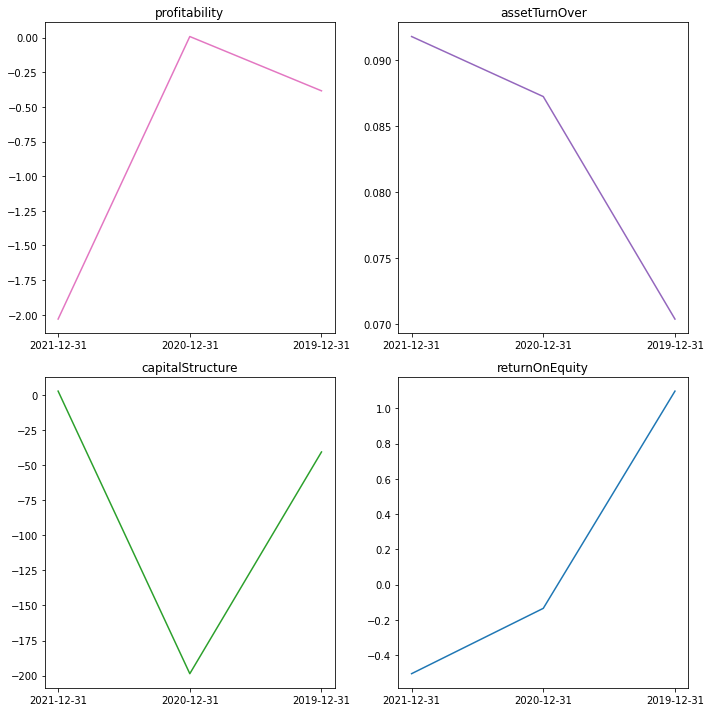

In [45]:
import matplotlib.pyplot as plt
fig, axs=plt.subplots(2,2, figsize=(10,10))
x=dp['date']
axs[0,0].plot(x,dp['profitability'],'tab:pink')
axs[0,0].set_title('profitability')
axs[0,1].plot(x,dp['assetTurnOver'], 'tab:purple')
axs[0,1].set_title('assetTurnOver')
axs[1,0].plot(x,dp['capitalStructure'],'tab:green')
axs[1,0].set_title('capitalStructure')
axs[1,1].plot(x,dp['returnOnEquity'], 'tab:blue')
axs[1,1].set_title('returnOnEquity')
fig.tight_layout()